#### Different ways of looking at autocorrelation

In [19]:
from matplotlib import pyplot as plt
import gcsfs

FILE_PATH = 'ml-datasets1/TimeSeries/temps.csv'

In [20]:
def corrwith(series):
    scores = []
    for lag in range(1,730):
        N = len(series)-lag
        start = series[0:N].reset_index()
        stop  = series[lag:].reset_index()
        del(start["index"])
        del(stop["index"])
        c = round(start.corrwith(stop),2)
        r = (lag,c[0])
        scores.append(r)
    return scores

In [27]:
def autocorr(series):
    scores = []
    for N in range(1,730):
        r = series.autocorr(lag=N)
        scores.append(r)
    return scores

In [15]:
# Read the file and put into Dataframe
fs = gcsfs.GCSFileSystem(project='TF images')
f  = fs.open(FILE_PATH)
COLS = ["Date", "Temp"]
df = pd.read_csv(f, usecols=COLS)

In [16]:
before = df.shape[0]
# Remove a few bad values
df["Temp"] = pd.to_numeric(df["Temp"], errors='coerce', downcast=None)
df = df.dropna()
after =df.shape[0]
print("Removed {} rows due to bad values".format(before-after))

Removed 3 rows due to bad values


In [17]:
series = pd.Series(data=df["Temp"])

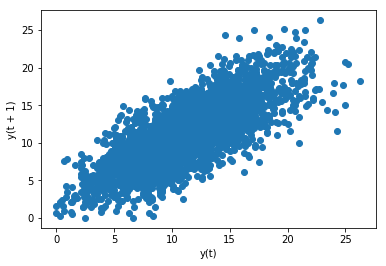

In [25]:
pd.plotting.lag_plot(series, lag=1)
plt.show()

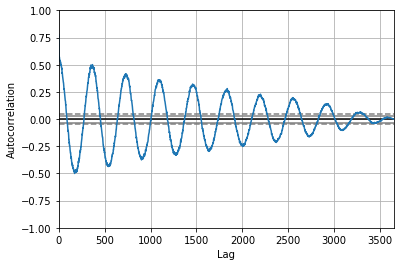

In [26]:
pd.plotting.autocorrelation_plot(series)
plt.show()

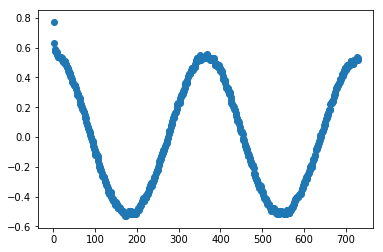

In [25]:
scores = corrwith(series)
X = [x[0] for x in scores]
Y = [x[1] for x in scores]

plt.scatter(X,Y)
plt.show()

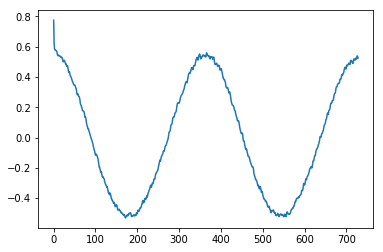

In [28]:
scores = autocorr(series)
plt.plot(scores)
plt.show()